# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
s_train, c_train = train['sizes'], train['coords']
s_test, c_test = test['sizes'], test['coords']

print("train.p features shape=", X_train.shape)
print("train.p labels shape=", y_train.shape)
print("train.p sizes shape=", s_train.shape)
print("train.p coords shape=", c_train.shape)

print("test.p features shape=", X_test.shape)
print("test.p labels shape=", y_test.shape)
print("test.p sizes shape=", s_test.shape)
print("test.p coords shape=", c_test.shape)


train.p features shape= (39209, 32, 32, 3)
train.p labels shape= (39209,)
train.p sizes shape= (39209, 2)
train.p coords shape= (39209, 4)
test.p features shape= (12630, 32, 32, 3)
test.p labels shape= (12630,)
test.p sizes shape= (12630, 2)
test.p coords shape= (12630, 4)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of testing examples
n_test = len(X_test)

# What's the shape of an image?
image_shape = X_train[0].shape

# How many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

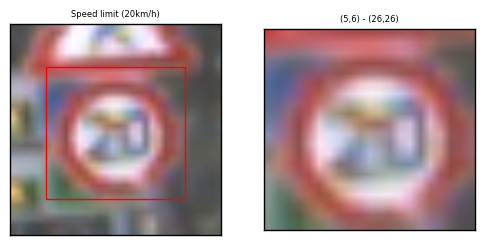

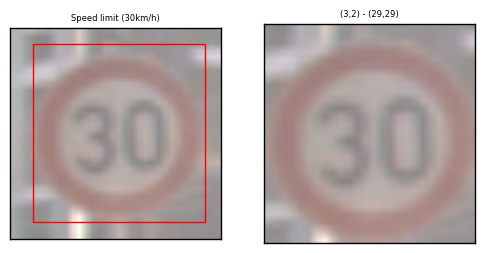

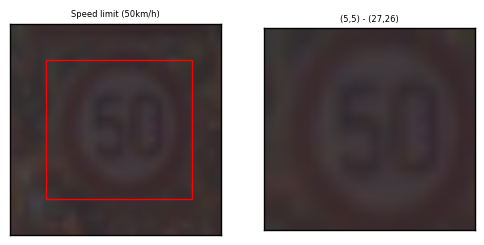

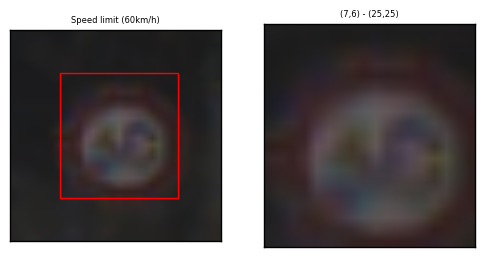

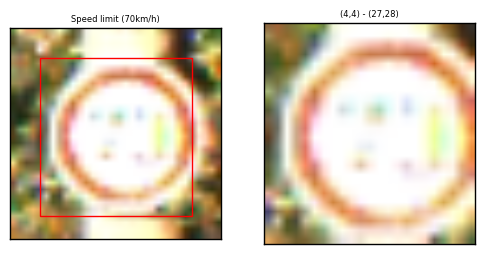

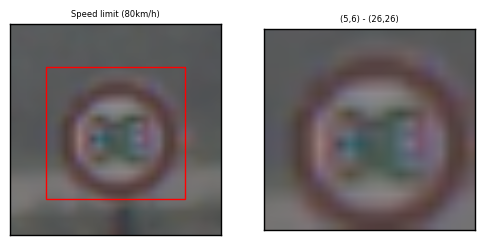

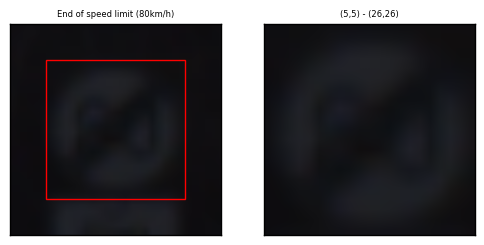

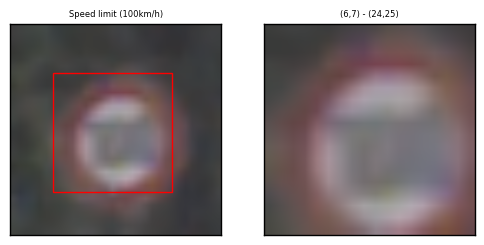

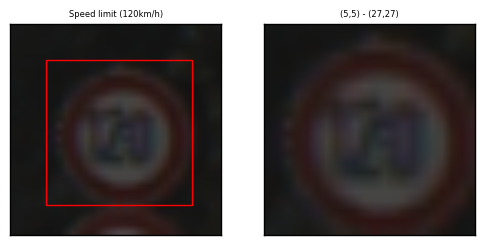

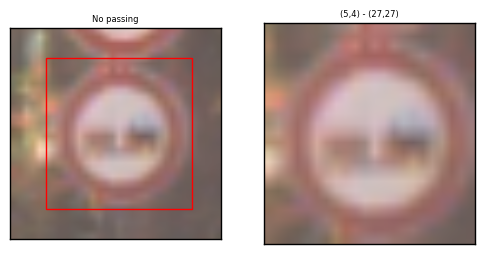

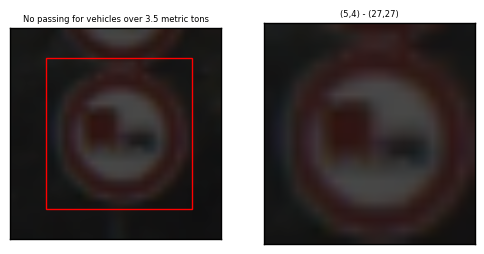

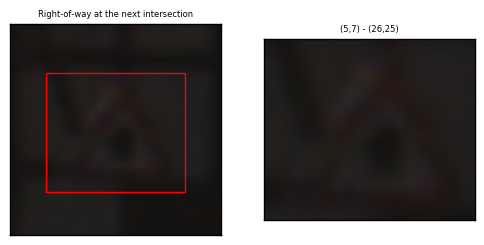

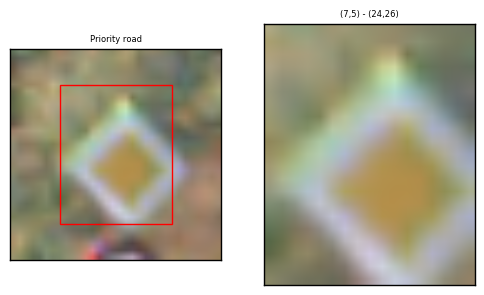

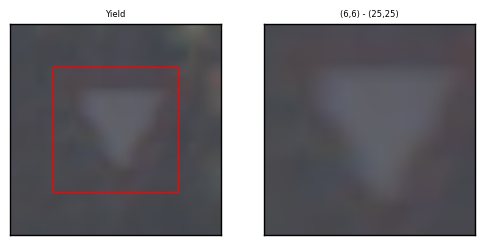

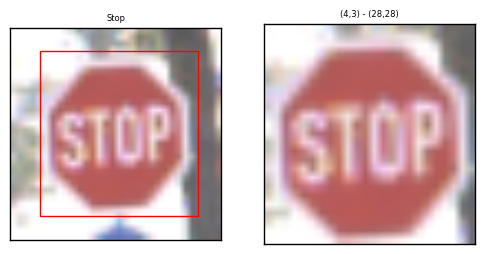

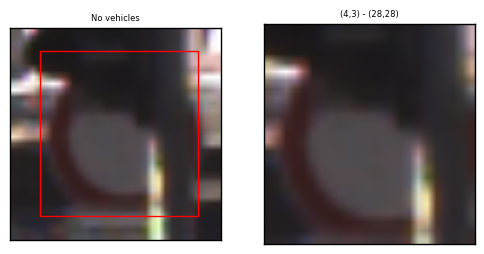

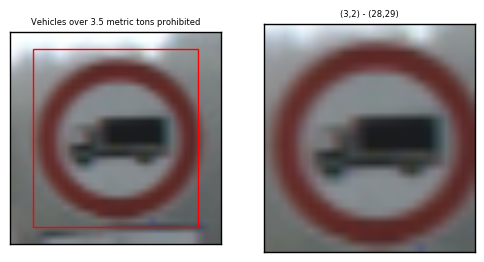

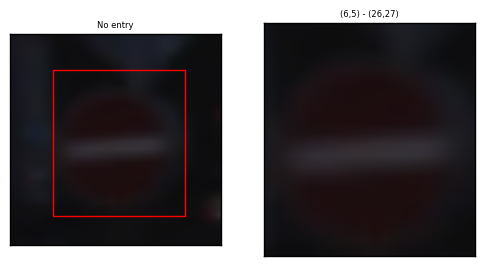

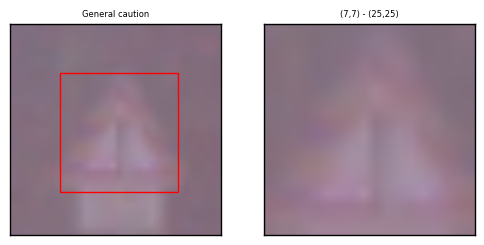

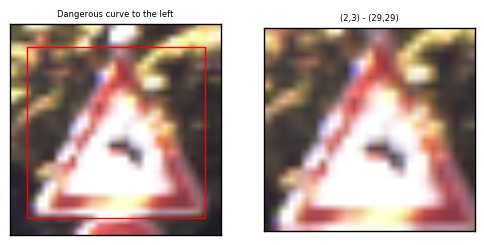

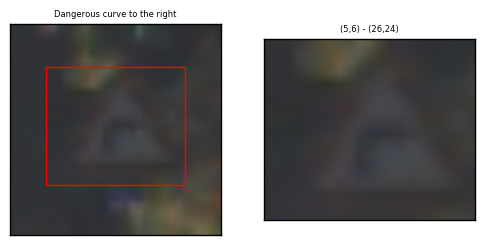

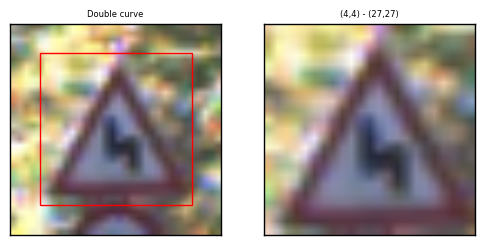

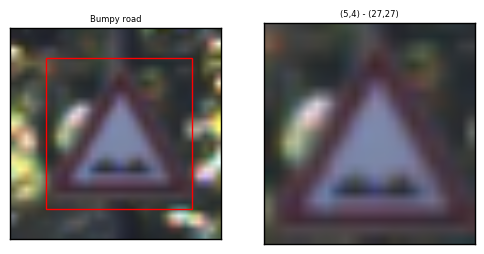

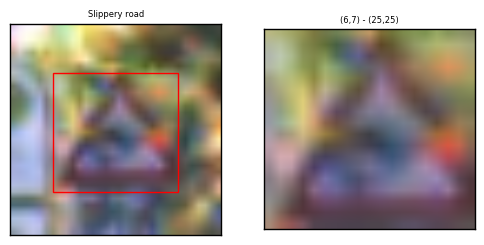

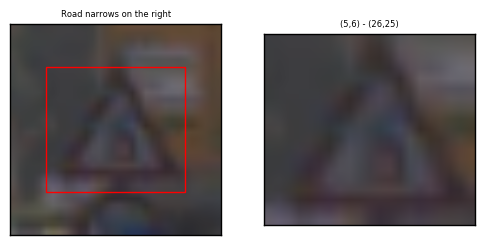

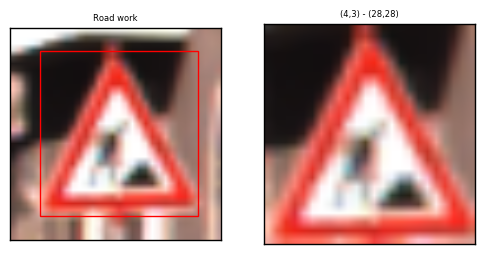

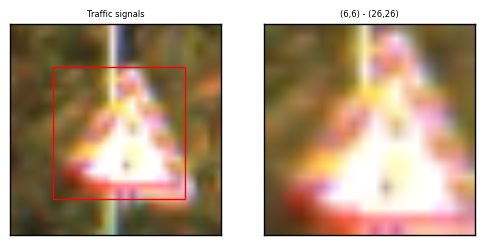

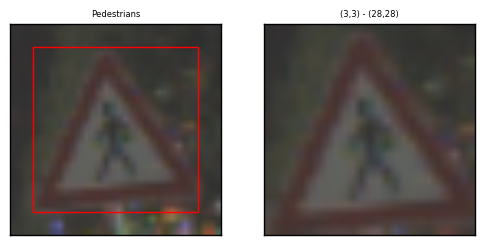

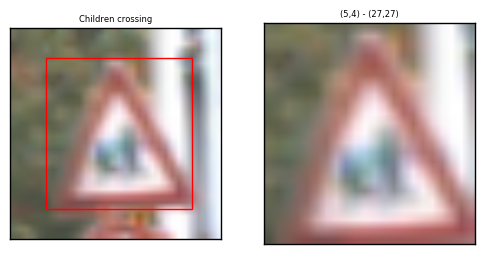

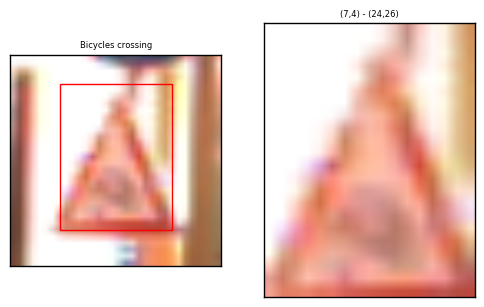

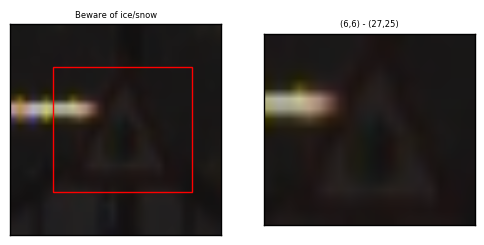

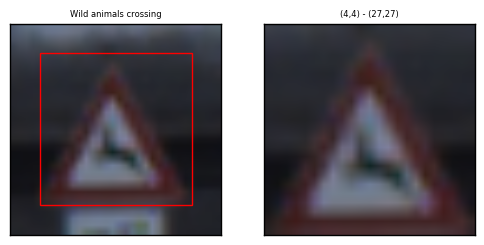

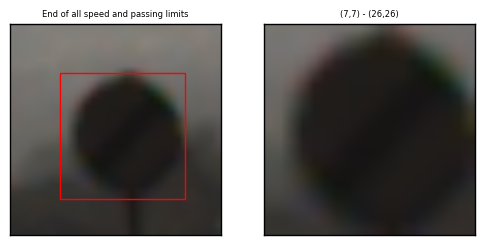

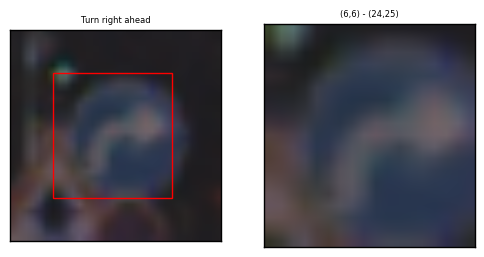

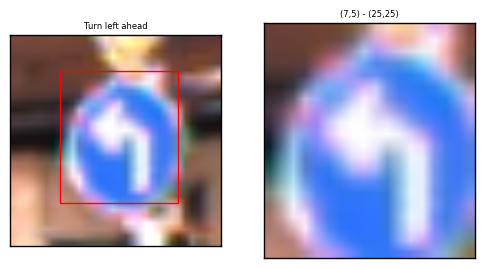

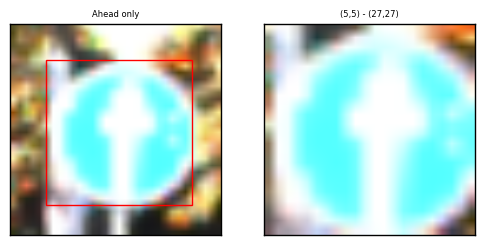

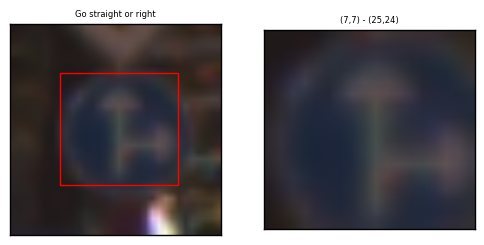

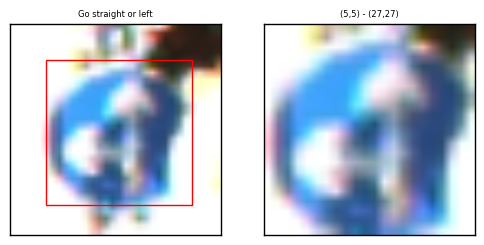

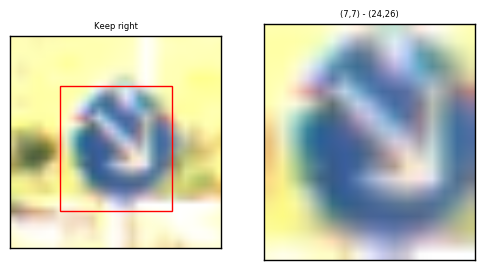

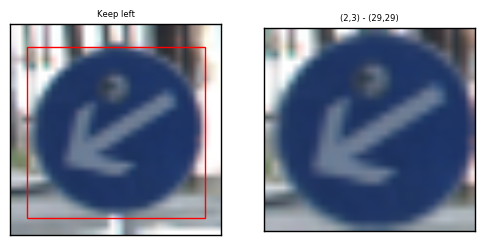

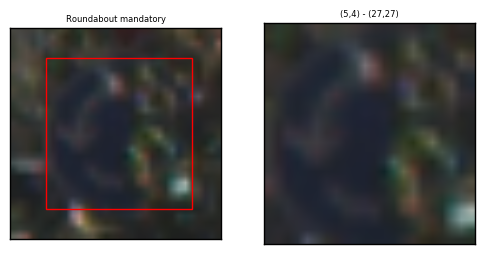

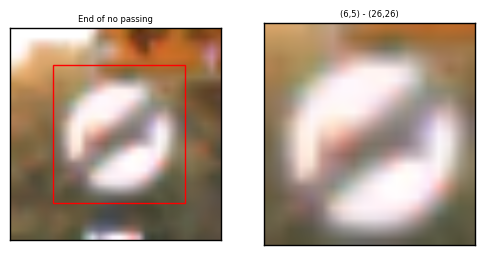

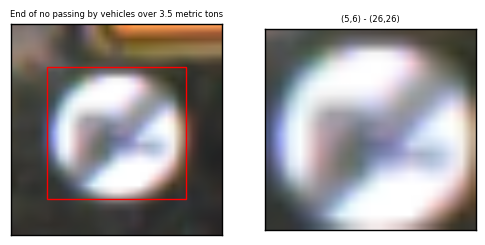

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import csv 

label_names = []
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        label_names.append(row[1])
    
# Visualizations will be shown in the notebook.
%matplotlib inline

for signno in range(0, n_classes):
#for signno in range(0, 6):
    index = 0
    while signno != y_train[index]:
        index += 1

    image = X_train[index]
    label = y_train[index]
    size = s_train[index]
    coord = c_train[index]
    rx1, ry1, rx2, ry2 = coord
    rx1 = int(rx1 * image_shape[0] / size[0])
    rx2 = int(rx2 * image_shape[0] / size[0])
    ry1 = int(ry1 * image_shape[1] / size[1])
    ry2 = int(ry2 * image_shape[1] / size[1])
    rw = rx2 - rx1
    rh = ry2 - ry1

    fig = plt.figure()
    subplot = fig.add_subplot(1,2,1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(label_names[label],fontsize=6)
    subplot.add_patch(plt.Rectangle(xy=[rx1, ry1], width=rw, height=rh, 
                                    fill=False, edgecolor='red'))
    subplot.imshow(image)
    
    subplot2 = fig.add_subplot(1,2,2)
    subplot2.set_xticks([])
    subplot2.set_yticks([])
    new_image = image[ry1:ry2, rx1:rx2]
    subplot2.set_title("(%d,%d) - (%d,%d)" % (rx1, ry1, rx2, ry2), fontsize=6)
    subplot2.imshow(new_image)
    plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
import cv2

def grayscale(image):
  converted = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return np.expand_dims(converted, axis=2)

# Scale the image pixel values to within range of [-0.5,0.5]
def normalize(image_data,max=255,deviation=0.5):
  return image_data/max - deviation

def pre_process_images(images):
  # Convert from rgb to grayscale 
  gray_image = [grayscale(image) for image in images]
    
  # Normalize
  normalized_image = [normalize(image) for image in gray_image]

  # Return processed images list as a numpy array
  return np.asarray(normalized_image)

# Pre-process training and test image data
X_train_normalized = pre_process_images(X_train)
X_test_normalized = pre_process_images(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I used two techniques. One is to convert the input images from rgb to grayscale, another is to nomalize between -0.5 and 0.5. Because brightness and contrast of the input images are not constant. This made learning easier to proceed.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

y_train.reshape(n_train, 1)
y_test.reshape(n_test, 1)

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

n_split = int(len(X_train_normalized) * 0.8)

X_split_train = X_train_normalized[:n_split]
X_validation = X_train_normalized[n_split:]

y_split_train = y_train[:n_split]
y_validation = y_train[n_split:]

n_split_train = len(X_split_train)
n_validation = len(X_validation)

print("n_split_train=", n_split_train)
print("n_validation=", n_validation)


n_split_train= 31367
n_validation= 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The test data which is more than 10,000 seems to be enough. But the validation data is nothing. CNN needs the validation data to check trainig status. So I shuffled the training data randamly and I generated the validation data from 20% of the training data. 

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x):
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    init_value = 0.1
    
    # Layer 1 - 32*32*1 to 16*16*32
    num_filters1 = 32
    conv1_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, num_filters1], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.constant(init_value, shape=[num_filters1]))

    conv1 = conv2d(x, conv1_W, conv1_b)
    conv1 = maxpool2d(conv1)
    conv1 = tf.nn.relu(conv1)
 
    # Layer 2 - 16*16*32 to 8*8*64
    num_filters2 = 64
    conv2_W = tf.Variable(tf.truncated_normal(shape=[5, 5, num_filters1, num_filters2], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.constant(init_value, shape=[num_filters2]))

    conv2 = conv2d(conv1, conv2_W, conv2_b)
    conv2 = maxpool2d(conv2)
    conv2 = tf.nn.relu(conv2)

    # Layer 3 - 8*8*64 to 4*4*128
    num_filters3 = 128
    conv3_W = tf.Variable(tf.truncated_normal(shape=[5, 5, num_filters2, num_filters3], mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.constant(init_value, shape=[num_filters3]))

    conv3 = conv2d(conv2, conv3_W, conv3_b)
    conv3 = maxpool2d(conv3)
    conv3 = tf.nn.relu(conv3)

    # Fully connected layer - 4*4*128 to 512
    # Reshape conv3 output to fit fully connected layer input
    num_fc1 = 512
    fc1_W = tf.Variable(tf.truncated_normal(shape=[4*4*num_filters3, num_fc1], mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.constant(init_value, shape=[num_fc1]))
        
    fc1 = tf.reshape(conv3, [-1, fc1_W.get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, fc1_W), fc1_b)
    fc1 = tf.nn.relu(fc1)

    # Dropout
    #drop_layer = tf.nn.dropout(fc1, keep_prob)
    
    # Output Layer - class prediction - 512 to 43
    num_out = n_classes
    out_W = tf.Variable(tf.truncated_normal(shape=[num_fc1, num_out], mean = mu, stddev = sigma))
    out_b = tf.Variable(tf.constant(init_value, shape=[num_out]))

    out = tf.add(tf.matmul(fc1, out_W), out_b)
    return out


In [7]:
# tf Graph input
image_height = image_width = image_shape[0]

x = tf.placeholder(tf.float32, [None, image_width, image_height, 1])
y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)
                                 
# Predictions
logits = conv_net(x)

# Define loss and optimizer
learning_rate = 0.001
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cost = tf.reduce_mean(cross_entropy)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(cost)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I used the typically CNN model - which is explained in lesson-30. It has a input layer, three hidden layers and two full connected layers. The input layer is 32x32x1. All hidden layers consist of conv/max_pool/relu. First hidden layer is 16x16x32, Second is 8x8x64 and Third is 4x4x128. Full connected layer is 512(flatten) and final layer is 43(flatten).


In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 128
EPOCHS = 50

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_split_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_split_train, y_split_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1), "Accuracy = {:.3f}".format(validation_accuracy))
        if validation_accuracy > 0.99: 
           break
        
    saver = tf.train.Saver()
    savepath = saver.save(sess, 'trained_model')
    print("Model saved")


Training...
EPOCH 1 ... Accuracy = 0.768
EPOCH 2 ... Accuracy = 0.913
EPOCH 3 ... Accuracy = 0.952
EPOCH 4 ... Accuracy = 0.957
EPOCH 5 ... Accuracy = 0.965
EPOCH 6 ... Accuracy = 0.967
EPOCH 7 ... Accuracy = 0.976
EPOCH 8 ... Accuracy = 0.964
EPOCH 9 ... Accuracy = 0.978
EPOCH 10 ... Accuracy = 0.984
EPOCH 11 ... Accuracy = 0.975
EPOCH 12 ... Accuracy = 0.982
EPOCH 13 ... Accuracy = 0.972
EPOCH 14 ... Accuracy = 0.988
EPOCH 15 ... Accuracy = 0.974
EPOCH 16 ... Accuracy = 0.976
EPOCH 17 ... Accuracy = 0.985
EPOCH 18 ... Accuracy = 0.990
Model saved


In [10]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trained_model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.922


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
First I used "GradientDescentOptimizer". I tried to change batch size, epochs and hyper prameters, but the accuracy didn't seem to go up more than 0.1. I tried to change "AdamOptimizer" as suggested in the forum. It got dramatically changed. The accuracy went up around 0.9 in few epochs. Also I changed bias initial value from zero to 0.1 and weight initial sigma value to 0.1. As a result of parameter adjustment, accuracy of 99% had come to be achieved by about 50 epochs.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I saw the sample of MNIST from the paper / web / Tensorflow page, but I noticed that CNN has a typical composition, although there are differences in the number of layers. 
So I first used the most understandable example - it's lesson-30 model that I mentioned above.
Also I saw the sample of CIFAR-10. It used normalize technique. So I decided to convert grayscale and normalize.
And I used "relu" activation function instead of "tanh".
Then I was troubled with the optimizer that I metioned above too. I got the infomation from the forum and changed to "Adam" optimizer. Finally hyperprameters adjustment got to the final solution. This solution seemed good for the result of the validation and the test, but it didn't seem to be enough in the next challenge. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

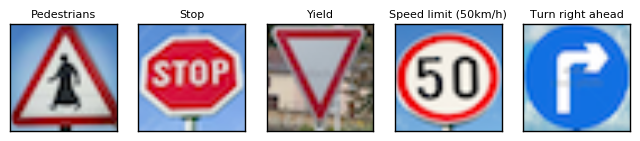

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os

test_dir_name = "test_images"
filenames = ["sign_pedestrian.png","sign_stop.png", "sign_yeild.png", "sign_speed_50.png", "sign_turn_right.png"]
test_images = [mpimg.imread(test_dir_name + "/" + file) for file in filenames]
test_labels = np.array([27, 14, 13, 2, 33], np.int32)

#for debug
#test_images = X_test[5000:5005]
#test_labels = y_test[5000:5005]

fig = plt.figure(figsize=(8,15))
for i in range(len(filenames)):
    subplot = fig.add_subplot(1,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(label_names[test_labels[i]],fontsize=8)
    subplot.imshow(test_images[i])


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I guess that the objects other than the target in the surroundings make classfication difficult. 
So it may be good to use "cropping" technique.

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trained_model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_images_normalized = pre_process_images(test_images)    
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: test_images_normalized, y: test_labels})  
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
It had failed completely. In order to check whether the saved data or the program is wrong, I tried to pick up the some test data, but it seems to be fine. Their accuracy is 100%...

probability: [[ 0.61264014  0.14230935  0.0873928   0.05707151  0.02669272]
 [ 0.61091518  0.17952293  0.08543321  0.02841488  0.02077657]
 [ 0.57893652  0.17113183  0.09947483  0.03575136  0.02642373]
 [ 0.47259256  0.20533586  0.16229637  0.0322829   0.02592468]
 [ 0.74530089  0.08729868  0.05258203  0.03617918  0.0155417 ]]
class ids: [[ 3 17 18 19 31]
 [ 3 17 18 19 38]
 [ 3 17 18 19 38]
 [ 3 17 18 19 38]
 [ 3 17 18 19 31]]


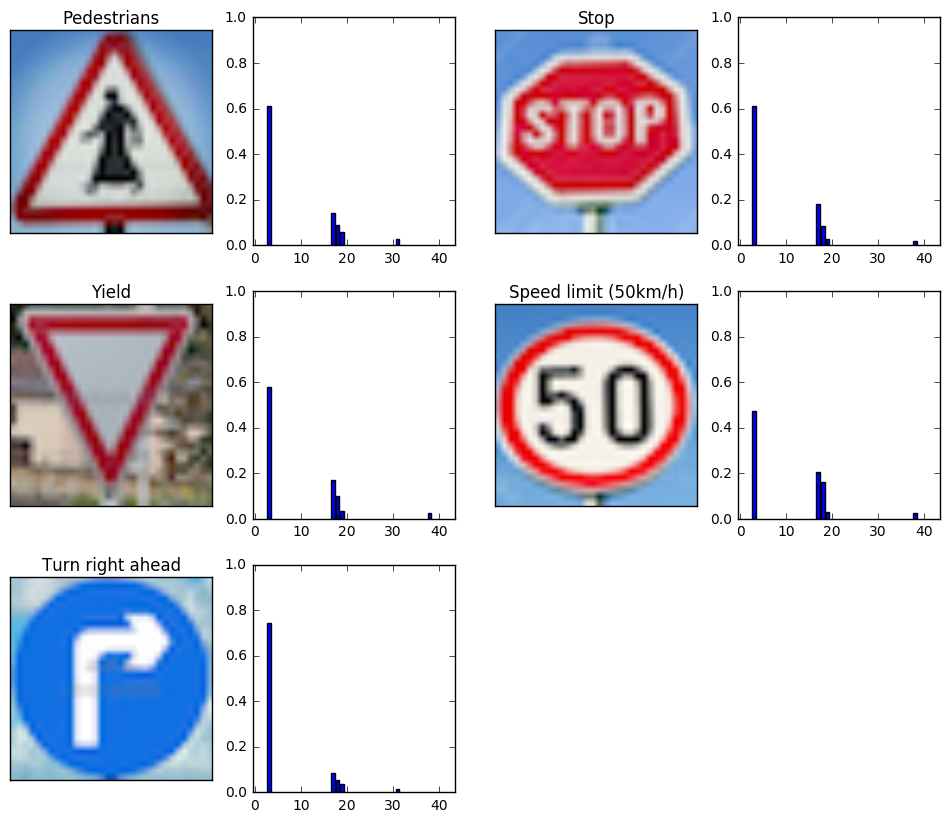

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.        
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trained_model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
            
    new_softmax_predictions = tf.nn.softmax(logits)
    top_k_list = tf.nn.top_k(new_softmax_predictions, k=5, sorted=True, name=None)
    probs, clsids = sess.run(top_k_list, feed_dict={x: test_images_normalized})

    print("probability:", probs)    
    print("class ids:", clsids)

    fig = plt.figure(figsize=(12,10))
    c=0
    for (image, label, prob, clsid) in zip(test_images, test_labels, probs, clsids):
        subplot = fig.add_subplot(3,4,c*2+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title(label_names[label])
        subplot.imshow(image)
        subplot = fig.add_subplot(3,4,c*2+2)
        subplot.set_xlim(-0.5,43.5)
        subplot.set_ylim(0,1)
        subplot.bar(clsid, prob, align='center')
        c += 1


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The plot of the softmax probabilities show that all predict 3[Speed limit(60km/h)]. And It doesn't appear the correct prediction in top_k.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.